# Felicidad y Covid en el Peru

In [1]:
# =============================================================================================================================
# El Perú es un país feliz dentro de una región feliz y en un mundo feliz?, qué factores se relacionan con la felicidad?, la 
# vacunación contra el covid es uno de ellos?. el PBI?, la generosidad?, existe alguna relación entre la felicidad y las 
# percepciones de corrupción o la libertad para tomar decisiones de vida?, tal vez con el apoyo social o las expectativas de 
# vida saludable?. Estos factores se relacionan igual a nivel mundial como en sudamérica?, Cuál es la situación del Perú?.
# El objetivo de este artículo es avanzar en responder estas preguntas a través de un analisis exploratorio de datos (EDA), 
# para lo cual se recurre al "World Happiness Index 2021" (Gallup World Poll) y el "Latest Worldwide Covid-19 Vaccine Data" de 
# World Health Organization (al 7 de noviembre 2021).
# Los resultados obtenidos serán siempre relativos y una foto del momento, que habrá que ir midiendo regularmente.
# ============================================================================================================================
# Nota 1: Las bases de datos -de dominio público- utilizadas se pueden obtener en:
# https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021
# https://www.kaggle.com/anandhuh/latest-worldwide-vaccine-data
# ============================================================================================================================
# Nota 2: El trabajo es un EDA desarrollado en Python. Los interesados en analítica de datos pueden seguir los códigos, sino los
# pueden obviar.
# ============================================================================================================================
# Indice:
# 1. Importar librerías
# 2. Importación y limpieza de datos
# 3. Unión de Bases de Datos
# 4. Análisis de datos
#    4.1 Paises más y menos felices en el mundo
#    4.2 Regiones más y menos felices en el mundo
#    4.3 Paises más y menos vacunados en el mundo
#    4.4 Regiones más y menos vacunadas en el mundo
#        4.4.1 Heterogeneidades al interior de las regiones en el mundo
#        4.4.2 Distribución de la variable "% de población completamente vacunada"
#    4.5 Vacunación y felicidad a nivel mundial
#    4.6 Y que pasa con Sudamerica?
#        4.6.1 Estableciendo un dataframe para sudamerica
#        4.6.2 Relaciones entre variables
#        4.6.3 Países de más a menos felicidad
#        4.6.4 Países de más a menos % de población totalmente vacunada
#        4.6.5 Indice de Felicidad vs factores asociados - En la Región y por países
#              4.6.5.1 Felicidad vs % de población completamente vacunada
#              4.6.5.2 Felicidad vs PBI percapita
#              4.6.5.3 Felicidad vs Apoyo social
#              4.6.5.4 Felicidad vs Expectativa de vida saludable
#              4.6.5.5 Felicidad vs Generosidad
#              4.6.5.6 Felicidad vs Percepciones de corrupción
#              4.6.5.7 Felicidad vs Libertad para tomar decisiones
# 5. Hallazgos
# ============================================================================================================================    

## 1. Importar librerías

In [104]:
# Wrangling
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

#plotly
import plotly.express as px 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")

np.warnings.filterwarnings('ignore')

## 2. Importación y Limpieza de datos

In [3]:
covid = pd.read_csv('./WH/Worldwide Vaccine Data.csv')
happiness = pd.read_csv('./WH/world-happiness-report-2021.csv')

In [4]:
# Revisión de datasets

In [5]:
covid.head().style.background_gradient()

,Country,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated
0,Afghanistan,8,3398410,8.900000,6.700000
1,Albania,67,1912563,36.000000,31.000000
2,Algeria,26,11179354,15.000000,11.000000
3,Angola,19,6164219,14.000000,5.200000
4,Argentina,135,60488335,77.000000,58.000000


In [6]:
happiness.head().style.background_gradient()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842000,0.032000,7.904000,7.780000,10.775000,0.954000,72.000000,0.949000,-0.098000,0.186000,2.430000,1.446000,1.106000,0.741000,0.691000,0.124000,0.481000,3.253000
1,Denmark,Western Europe,7.620000,0.035000,7.687000,7.552000,10.933000,0.954000,72.700000,0.946000,0.030000,0.179000,2.430000,1.502000,1.108000,0.763000,0.686000,0.208000,0.485000,2.868000
2,Switzerland,Western Europe,7.571000,0.036000,7.643000,7.500000,11.117000,0.942000,74.400000,0.919000,0.025000,0.292000,2.430000,1.566000,1.079000,0.816000,0.653000,0.204000,0.413000,2.839000
3,Iceland,Western Europe,7.554000,0.059000,7.670000,7.438000,10.878000,0.983000,73.000000,0.955000,0.160000,0.673000,2.430000,1.482000,1.172000,0.772000,0.698000,0.293000,0.170000,2.967000
4,Netherlands,Western Europe,7.464000,0.027000,7.518000,7.410000,10.932000,0.942000,72.400000,0.913000,0.175000,0.338000,2.430000,1.501000,1.079000,0.753000,0.647000,0.302000,0.384000,2.798000


In [7]:
# Revisión de datos nulos

In [8]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [9]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            186 non-null    object 
 1   Doses administered per 100 people  186 non-null    int64  
 2   Total doses administered           186 non-null    int64  
 3   % of population vaccinated         186 non-null    float64
 4   % of population fully vaccinated   186 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.4+ KB


In [10]:
# No hay problemas de datos faltantes, lo que facilita el procesamiento de datos. Sin embargo, happiness tiene 149 registros
# o paises mientras que covid tiene 186, lo que significa que al unir las bases habrá información que se pierda.

## 3. Unión de Bases de Datos

In [11]:
# Unión de las bases de datos:
# - Se usará Country como variable clave por lo que los nombres de los paises deben coincidir así como el nombre de la variable.

In [12]:
# Se elabora una lista y numero de paises de cada dataframe
print(covid.sort_values(by=["Country"])["Country"].values, '\n', len(covid.sort_values(by=["Country"])["Country"]))

print(happiness.sort_values(by=['Country name'])['Country name'].values, '\n', len(happiness.sort_values(by=['Country name'])['Country name']))

# El '\n', es para crear un salto de linea entre los valores y la longitud.

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'Colombia' 'Comoros' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic'
 'Denmark' 'Djibouti' 'Dominican Rep.' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati' 'Kosovo' 'Kuwait' 'Kyrgyzstan'
 'Laos' 'Latvia' 'Lebano

In [13]:
# Se observa que Reino Unido tiene el nombre distimto en ambas bases y se debe corregir:

In [14]:
covid[covid['Country']=='U.K.']

,Country,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated
173,U.K.,156,104477012,75.0,68.0


In [15]:
covid.loc[173,'Country'] = 'United Kingdom'

In [16]:
# Se verifica la correción
covid.loc[173,'Country']

'United Kingdom'

In [17]:
# Se procede a la unión de las bases de datos covid y happiness:

In [83]:
df = covid.merge(happiness, left_on='Country', right_on='Country name', how='inner')
del df['Country name'] # Se dene borrar la columna Country name

df = df.sort_values(by=['Country']) # Se ordena por paises
df.head().style.background_gradient()

,Country,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,8,3398410,8.900000,6.700000,South Asia,2.523000,0.038000,2.596000,2.449000,7.695000,0.463000,52.493000,0.382000,-0.102000,0.924000,2.430000,0.370000,0.000000,0.126000,0.000000,0.122000,0.010000,1.895000
1,Albania,67,1912563,36.000000,31.000000,Central and Eastern Europe,5.117000,0.059000,5.234000,5.001000,9.520000,0.697000,68.999000,0.785000,-0.030000,0.901000,2.430000,1.008000,0.529000,0.646000,0.491000,0.168000,0.024000,2.250000
2,Algeria,26,11179354,15.000000,11.000000,Middle East and North Africa,4.887000,0.053000,4.991000,4.783000,9.342000,0.802000,66.005000,0.480000,-0.067000,0.752000,2.430000,0.946000,0.765000,0.552000,0.119000,0.144000,0.120000,2.242000
3,Argentina,135,60488335,77.000000,58.000000,Latin America and Caribbean,5.929000,0.056000,6.040000,5.819000,9.962000,0.898000,69.000000,0.828000,-0.182000,0.834000,2.430000,1.162000,0.980000,0.646000,0.544000,0.069000,0.067000,2.461000
4,Armenia,23,677032,16.000000,7.100000,Commonwealth of Independent States,5.283000,0.058000,5.397000,5.168000,9.487000,0.799000,67.055000,0.825000,-0.168000,0.629000,2.430000,0.996000,0.758000,0.585000,0.540000,0.079000,0.198000,2.127000


In [19]:
# Se seleccionan las variables relevantes para el análisis: 
# 1. Se eliminan las variables Expalin by ... por ser rankings internos con información redundante, lo mismo con upper y lower whisker.
# 2. Se elimina las variables referidas a Dystopia (pais imaginario que tiene los valores nacionales mínimos de la muestra en todas las variables).
# 3. En las variables sobre covid nos enfocamos en los porcentajes de población vacunada. 

In [20]:
relevantes = ['Country','Regional indicator', '% of population vaccinated', '% of population fully vaccinated', 
            'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy','Generosity', 'Perceptions of corruption', 'Freedom to make life choices']

In [21]:
dfinal = df[relevantes]
dfinal.head(5).style.background_gradient()

,Country,Regional indicator,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Generosity,Perceptions of corruption,Freedom to make life choices
0,Afghanistan,South Asia,8.900000,6.700000,2.523000,7.695000,0.463000,52.493000,-0.102000,0.924000,0.382000
1,Albania,Central and Eastern Europe,36.000000,31.000000,5.117000,9.520000,0.697000,68.999000,-0.030000,0.901000,0.785000
2,Algeria,Middle East and North Africa,15.000000,11.000000,4.887000,9.342000,0.802000,66.005000,-0.067000,0.752000,0.480000
3,Argentina,Latin America and Caribbean,77.000000,58.000000,5.929000,9.962000,0.898000,69.000000,-0.182000,0.834000,0.828000
4,Armenia,Commonwealth of Independent States,16.000000,7.100000,5.283000,9.487000,0.799000,67.055000,-0.168000,0.629000,0.825000


In [22]:
# Una breve descripción de las variables a utilizar en el análisis:

In [23]:
## % of population vaccinated: Con al menos 1 dosis.
## % of population fully vaccinated: Con dos dosis.
## Ladder score: Indice de felicidad. El mínimo es 0 y 10 es el score de mayor felicidad.
## Logged GDP per capita: PBI percapita (En términos de Poder de paridad de compra, ajustado a dólares constantes del 2011).Datos de 2019 o 2018.
## Social support: Apoyo social. Va de 0 a 1, donde 1 es el valor más alto. Es el promedio nacional a la respuesta binaria de "si se tiene o no alguien que lo pueda ayudar ante una necesidad".
## Healthy life expectancy: Promedio nacional de la Expectativa de vida saludable (en años).
## Generosity: Generosidad: Es el residuo de regresionar el promedio nacional de la respuesta binaria "si ha donado dinero a la caridad el mes pasado" contra el PBI percapita. 
## Pereceptions of corruption: Percepciones de corrupción. Es el promedio de dos respuestas binarias: 1) La corrupción está generalizada en el gobierno?, 2) La corrupción está generalizada en las empresas?.
## Freedom to make life choices: Libertad de elección. Va de 0 a 1, donde 1 es mayor libertad. Es el promedio a la respuesta binaria de "si está satisfecho o no con su libertad de elegir qué hacer con su vida".

In [24]:
dfinal.describe()

,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Generosity,Perceptions of corruption,Freedom to make life choices
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,43.758993,37.280576,5.549705,9.425108,0.817360,65.006309,-0.011647,0.731662,0.793777
std,27.479531,26.619103,1.086108,1.139899,0.114312,6.654384,0.153568,0.182414,0.113595
min,0.800000,0.300000,2.523000,6.958000,0.463000,48.478000,-0.288000,0.082000,0.382000
25%,19.000000,11.500000,4.853000,8.541500,0.748000,59.882000,-0.124000,0.677500,0.725000
50%,45.000000,35.000000,5.581000,9.557000,0.832000,66.603000,-0.034000,0.795000,0.807000
75%,70.000000,62.000000,6.282000,10.375500,0.909000,69.573500,0.082000,0.848000,0.878000
max,88.000000,87.000000,7.842000,11.647000,0.983000,76.953000,0.542000,0.939000,0.970000


## 4. Análisis de datos

### 4.1 Paises más y menos felices en el mundo

In [27]:
print("Indice de felicidad mas bajo a nivel mundial",dfinal["Ladder score"].min())
print("Indice de felicidad mas alto a nivel mundial",dfinal["Ladder score"].max())
print("Indice de felicidad promedio a nivel mundial",dfinal["Ladder score"].mean())

Indice de felicidad mas bajo a nivel mundial 2.523
Indice de felicidad mas alto a nivel mundial 7.842
Indice de felicidad promedio a nivel mundial 5.549705035971224


In [28]:
# Finlandia es el pais con mas alto indice de felicidad en el mundo con 7.842, miemntras que Afganistan es el menos feliz con
# 2.523

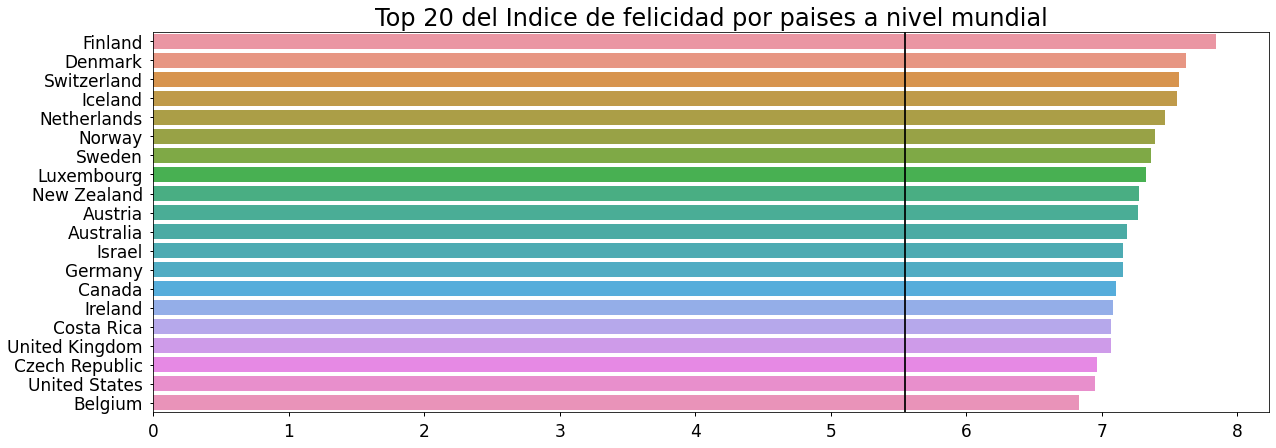

         Country  Ladder score
0        Finland         7.842
1        Denmark         7.620
2    Switzerland         7.571
3        Iceland         7.554
4    Netherlands         7.464
..           ...           ...
134      Lesotho         3.512
135     Botswana         3.467
136       Rwanda         3.415
137     Zimbabwe         3.145
138  Afghanistan         2.523

[139 rows x 2 columns]


In [29]:
# dfinal.groupby('Country')['Ladder score'].mean().sort_values(ascending = False)

pl = pd.DataFrame(dfinal.groupby('Country')['Ladder score'].mean().sort_values(ascending = False))
pl.reset_index(inplace=True)

pl.columns = ['Country', 'Ladder score']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=pl['Ladder score'][:20], y=pl['Country'][:20])
barplot.set(xlabel='', ylabel='')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title("Top 20 del Indice de felicidad por paises a nivel mundial", fontsize=24)
plt.axvline(pl["Ladder score"].mean(), c = "black") # Linea vertical en la media mundial de 'Ladder score'
plt.show();

print(pl)

In [30]:
# Costa Rica en el puesto 16 es el único pais latinoamericano entre los 20 paises más "felices", con un score de 7.062.

### 4.2 Regiones más y menos felices en el mundo

In [31]:
dfinal.groupby('Regional indicator')['Ladder score'].describe()

,count,mean,std,min,25%,50%,75%,max
Regional indicator,,,,,,,,
Central and Eastern Europe,17.0,5.984765,0.493325,5.101,5.81300,6.0780,6.2550,6.965
Commonwealth of Independent States,12.0,5.467000,0.438116,4.875,5.14475,5.4715,5.7495,6.179
East Asia,3.0,5.820667,0.133178,5.677,5.76100,5.8450,5.8925,5.940
Latin America and Caribbean,19.0,5.927158,0.707040,3.615,5.80200,6.0120,6.3130,7.069
Middle East and North Africa,15.0,5.177200,0.987650,3.658,4.59000,4.8870,5.7580,7.157
North America and ANZ,4.0,7.128500,0.138057,6.951,7.06500,7.1430,7.2065,7.277
South Asia,7.0,4.441857,0.993462,2.523,4.07200,4.9340,5.1115,5.269
Southeast Asia,9.0,5.407556,0.606271,4.426,5.03000,5.3840,5.8800,6.377
Sub-Saharan Africa,33.0,4.496242,0.655270,3.145,4.10700,4.6250,4.9840,6.049


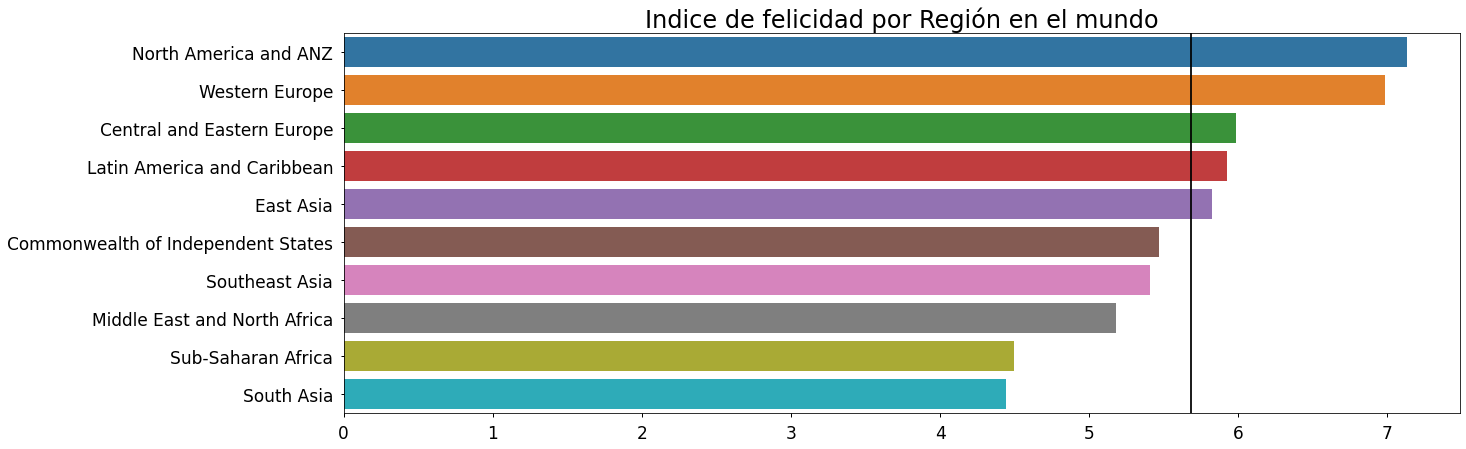

                   Regional indicator  Ladder score
0               North America and ANZ      7.128500
1                      Western Europe      6.983850
2          Central and Eastern Europe      5.984765
3         Latin America and Caribbean      5.927158
4                           East Asia      5.820667
5  Commonwealth of Independent States      5.467000
6                      Southeast Asia      5.407556
7        Middle East and North Africa      5.177200
8                  Sub-Saharan Africa      4.496242
9                          South Asia      4.441857


In [32]:
plr = pd.DataFrame(dfinal.groupby('Regional indicator')['Ladder score'].mean().sort_values(ascending = False))
plr.reset_index(inplace=True)

plr.columns = ['Regional indicator', 'Ladder score']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=plr['Ladder score'], y=plr['Regional indicator'])
barplot.set(xlabel='', ylabel='')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title("Indice de felicidad por Región en el mundo", fontsize=24)
plt.axvline(plr["Ladder score"].mean(), c = "black") # Linea vertical en la media regional a nivel mundial de 'Ladder score'
plt.show();

print(plr)

In [33]:
# Con respecto a las regiones en el mundo, Norteamerica and ANZ (EE.UU, Canada, New Zealand y Australia) comanda la lista 
# seguido por Europa(Este y Oeste), LAC y Asia del Este, regiones que están por encima de la media regiomnal en el mundo que es 
# de 5.68.

### 4.3 Paises más y menos vacunados en el mundo

In [36]:
print("% de vacunación total mas bajo en el mundo",dfinal["% of population fully vaccinated"].min())
print("% de vacunación total mas alto en el mundo",dfinal["% of population fully vaccinated"].max())
print("% de vacunacion total promedio en el mundo",dfinal["% of population fully vaccinated"].mean())

% de vacunación total mas bajo en el mundo 0.3
% de vacunación total mas alto en el mundo 87.0
% de vacunacion total promedio en el mundo 37.28057553956834


In [37]:
# El país con mayor % de población completamente vacunada es Portugal con 87%, el último es Haití con 0.3%. La media mundial es
# 37.3%.

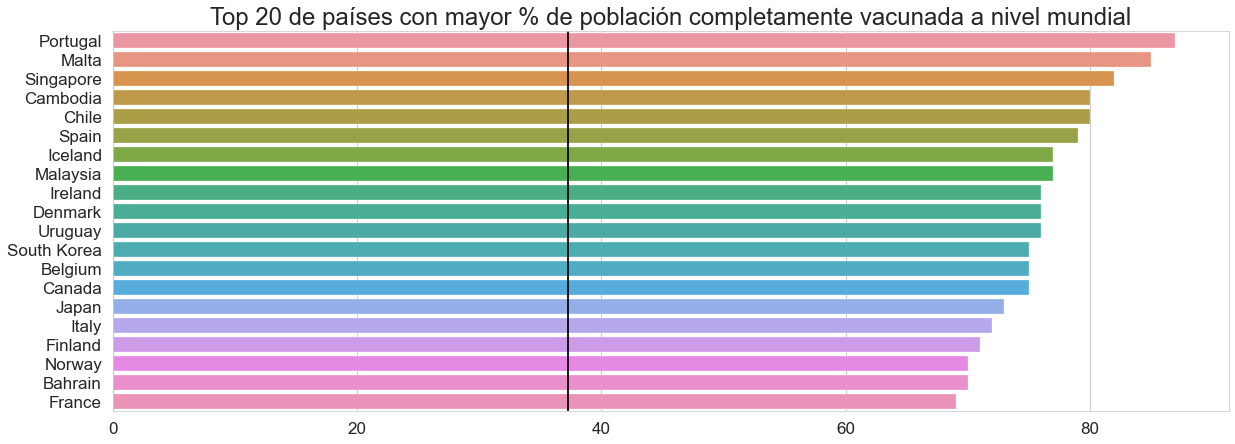

        Country  % of population fully vaccinated
0      Portugal                              87.0
1         Malta                              85.0
2     Singapore                              82.0
3      Cambodia                              80.0
4         Chile                              80.0
..          ...                               ...
134  Madagascar                               0.7
135       Yemen                               0.7
136    Cameroon                               0.6
137        Chad                               0.4
138       Haiti                               0.3

[139 rows x 2 columns]


In [260]:
# dfinal.groupby('Country')['Ladder score'].mean().sort_values(ascending = False)

ptv = pd.DataFrame(dfinal.groupby('Country')['% of population fully vaccinated'].mean().sort_values(ascending = False))
ptv.reset_index(inplace=True)

ptv.columns = ['Country', '% of population fully vaccinated']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=ptv['% of population fully vaccinated'][:20], y=ptv['Country'][:20])
barplot.set(xlabel='', ylabel='')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title("Top 20 de países con mayor % de población completamente vacunada a nivel mundial", fontsize=24)
plt.axvline(ptv["% of population fully vaccinated"].mean(), c = "black") # Linea vertical en la media mundial de % of population fully vaccinated'
plt.show();

print(ptv)

In [39]:
# Chile con 80% de población completamente vacunada ocupa un meritorio quinto lugar en el mundo y Junto a Uruguay (puesto 11) 
# son los únicos paises de latinoamerica en el top 20.

### 4.4 Regiones más y menos vacunadas en el mundo

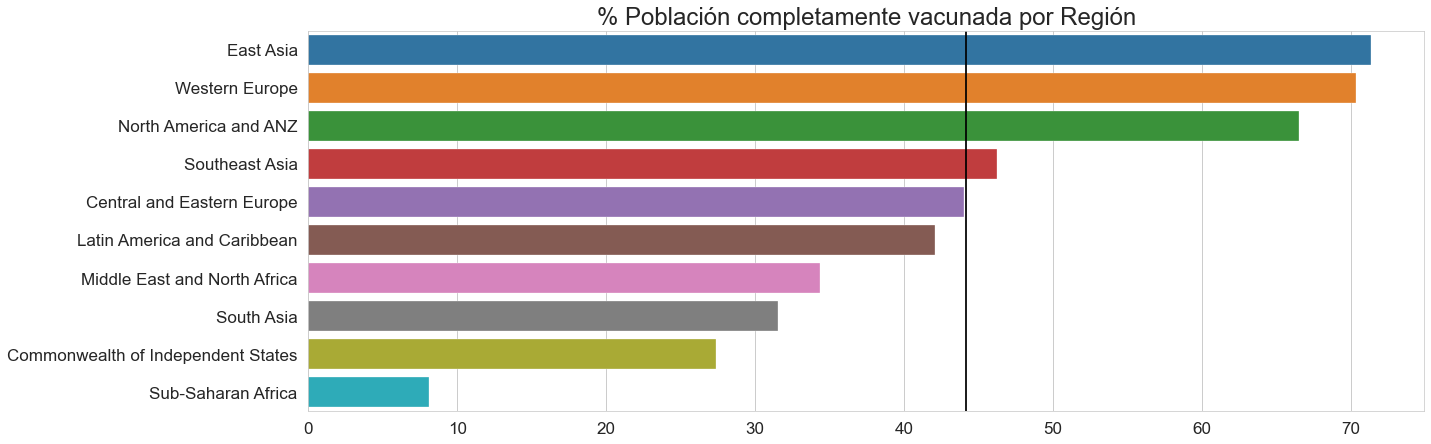

                   Regional indicator  % of population fully vaccinated
0                           East Asia                         71.333333
1                      Western Europe                         70.350000
2               North America and ANZ                         66.500000
3                      Southeast Asia                         46.222222
4          Central and Eastern Europe                         44.000000
5         Latin America and Caribbean                         42.042105
6        Middle East and North Africa                         34.333333
7                          South Asia                         31.528571
8  Commonwealth of Independent States                         27.341667
9                  Sub-Saharan Africa                          8.133333


In [261]:
pv = pd.DataFrame(dfinal.groupby('Regional indicator')['% of population fully vaccinated'].mean().sort_values(ascending = False))
pv.reset_index(inplace=True)

pv.columns = ['Regional indicator', '% of population fully vaccinated']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=pv['% of population fully vaccinated'], y=pv['Regional indicator'])
barplot.set(xlabel='', ylabel='')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title("% Población completamente vacunada por Región", fontsize=24)
plt.axvline(pv["% of population fully vaccinated"].mean(), c = "black") # Linea vertical en la media regional a nivel mundial de % of population fully vaccinated.
plt.show();

print(pv)

In [41]:
# Mientras que la región con un mayor porcentaje de población completamente vacunada es Asia del Este seguido por Europa occidental,
# LAC está en un sexto lugar bastante lejos de los primeros y también de los últimos, y por debajo de la media regional en el mundo (43%).

#### 4.4.1 Heterogeneidades al interior de las Regiones en el mundo

In [42]:
dfinal.groupby('Regional indicator')['% of population fully vaccinated'].describe()

,count,mean,std,min,25%,50%,75%,max
Regional indicator,,,,,,,,
Central and Eastern Europe,17.0,44.000000,12.752451,21.0,37.00,43.0,54.0,62.0
Commonwealth of Independent States,12.0,27.341667,13.956456,7.1,17.75,24.0,35.0,54.0
East Asia,3.0,71.333333,4.725816,66.0,69.50,73.0,74.0,75.0
Latin America and Caribbean,19.0,42.042105,22.497045,0.3,26.00,48.0,57.5,80.0
Middle East and North Africa,15.0,34.333333,24.212620,0.7,11.00,35.0,59.5,70.0
North America and ANZ,4.0,66.500000,6.952218,58.0,64.00,66.5,69.0,75.0
South Asia,7.0,31.528571,23.304271,6.7,18.50,23.0,43.5,67.0
Southeast Asia,9.0,46.222222,26.859718,11.0,27.00,39.0,77.0,82.0
Sub-Saharan Africa,33.0,8.133333,12.210028,0.4,1.50,3.6,10.0,67.0


In [43]:
# Si observamos la desviación estandar del % de vacunación en cada región (std), podemos constatar que en Asia del Sur y del
# Sudeste, en el Medio Este y Norte de Africa y en LAC existen grandes diferencias en la vacunación al interior de dichas 
# regiones entre los paises que la conforman. El caso contrario se da en Asia del Este, Norteamérica-ANZ y Europa occidental.
# En el caso de LAC que es el que más conocemnos, podría deberse a que cada país actúa por su cuenta, sin concertar con sus 
# vecinos, y por ello el que mejor gestión tenga para conseguir las vacunas y administrarlas a la población estará en mejor 
# situación. 

#### 4.4.2 Distribución de la variable "% de población completamente vacunada según Regiones en el mundo"

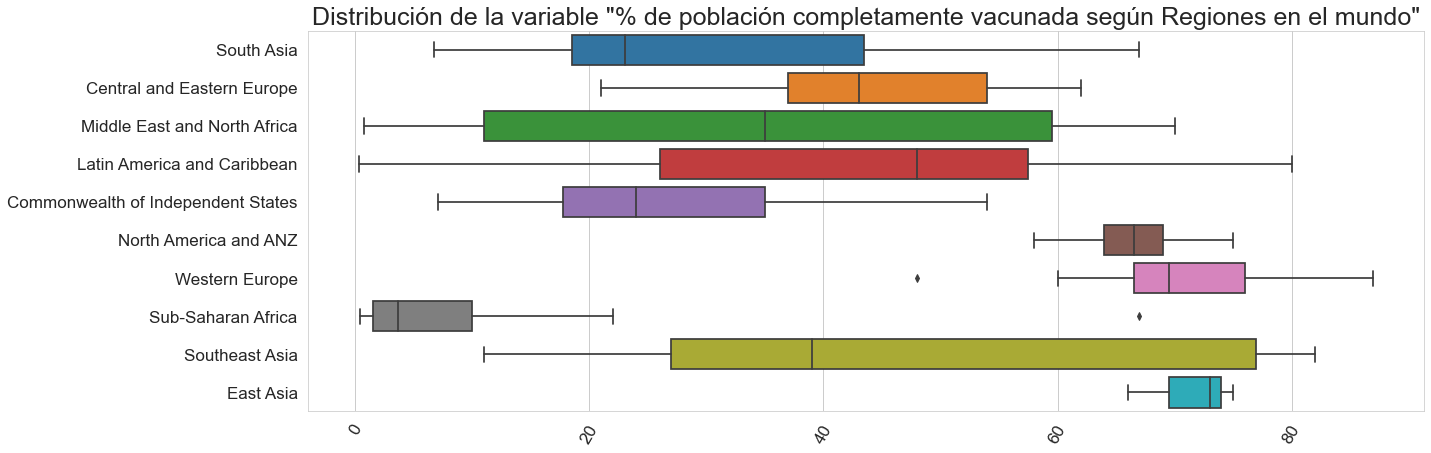

In [264]:
plt.figure(figsize=(20, 7))

sns.set_style('whitegrid')
boxplot = sns.boxplot(x='% of population fully vaccinated', y='Regional indicator', data=dfinal)
boxplot.set(xlabel='', ylabel='')
plt.title('Distribución de la variable "% de población completamente vacunada según Regiones en el mundo"', fontsize=25)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [45]:
# El gráfico anterior ratifica lo dicho anteriormente. East Asia tiene, en este caso, no solo la mediana de vacunación mas alta
# sino también el menor rango en la distribución de datos (menor diferencia entre el mayor y menor), miemtras que en LAC la mediana
# está en el rango medio y el intervalo entre los datos menor y mayor es el mas extenso,producto probablemente de su accionar
# individual.

### 4.5 Vacunación y Felicidad a nivel mundial

In [46]:
# Una buena manera de iniciar la observaciUn de las posibles relaciones entre vacunacion y felicidad es a través de la Matriz 
# de Correlación:

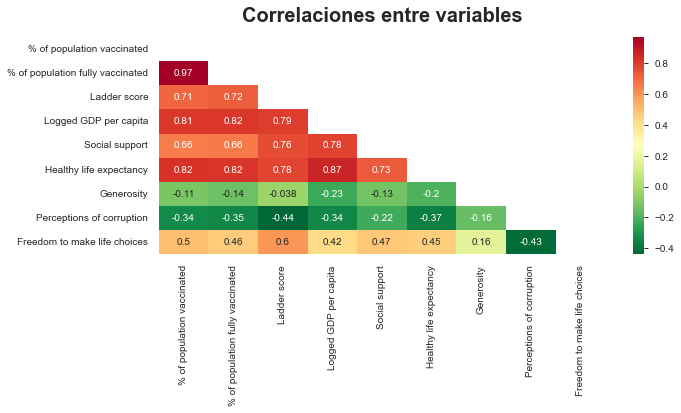

In [134]:
plt.figure(figsize=(10, 4))
sns.heatmap(dfinal.corr(), annot = True, cmap='RdYlGn_r', mask=np.triu(np.ones_like(dfinal.corr())));
plt.title('Correlaciones entre variables', fontsize=20, fontweight='bold', pad=15);

In [48]:
# A nivel mundial, los porcentajes de vacunación y el Indice de felicidad tienen una correlación de 0.72, lo cual demuestra que
# hay una relación positiva entre ambas variables y que no es baja, por lo que no se puede dejar de tomarle la importancia del 
# caso. Sin embargo, la vacunación tiene una correlación superior a 0.8 con el Producto Bruto Interno (GDP) percapita y con las 
# expectativas de vida saludable. Y estas dos últimas (PBI y Expectativas de vida saludable) tienen entre ellas una correación 
# de 0.87 lo que es bastante ilustrativo, interesante sería determinar el sentido de la causalidad (queda como tarea).
# Por su parte el Indice de felicidad (Ladder Score) tiene su correlación más alta con el PBI perrcapita (0.79), las Expectativas
# de vida saludable (0.78) y con el Apoyo social (0.76). No guarda relación con la gemerosidad (-0.038), y su relación con las 
# percepciones de corrupción y libertad de tomar decisiones de vida son bajas (-0.44 y 0.6 respectivamente).

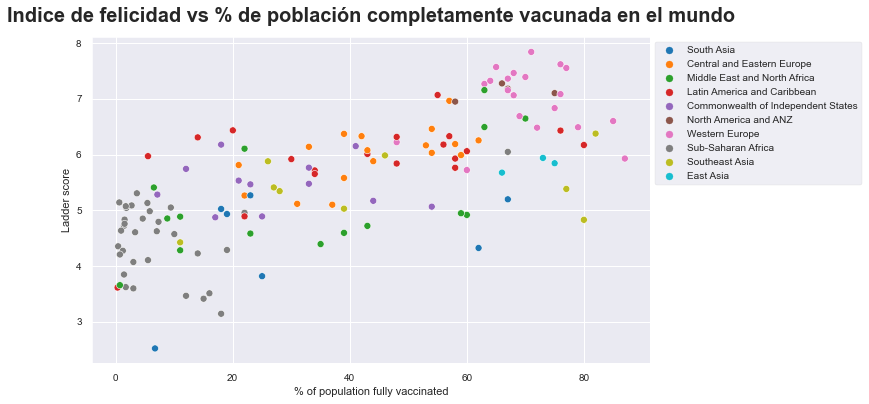

In [276]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="% of population fully vaccinated", y="Ladder score", hue="Regional indicator", data=dfinal)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('Indice de felicidad vs % de población completamente vacunada en el mundo', fontsize=20, fontweight='bold', pad=15);

plt.show();

In [ ]:
# Con una correlación de 0.72, el gráfico apoya en mostrar que existe una tendencia positiva entre un mayor porcentaje de 
# población vacunada y un mayor índice de felicidad. No se pretende decir aquí que a mayor población vacunada más feliz es su población ni
# viceversa, pero la relación se da.

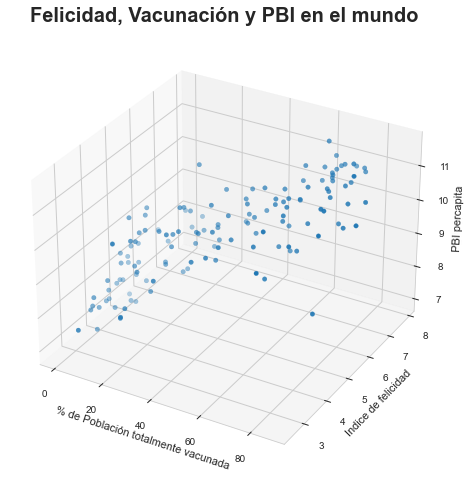

In [258]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (50, 8))
ax = fig.add_subplot(111, projection = '3d')

x=dfinal['% of population fully vaccinated']
y=dfinal['Ladder score']
z = df['Logged GDP per capita']

surface = ax.scatter(x, y, z)
ax.set_xlabel("% de Población totalmente vacunada")
ax.set_ylabel("Indice de felicidad")
ax.set_zlabel("PBI percapita")
ax.grid(True)

# rotate the axes and update
for angle in range(0, 0):
    ax.view_init(0, angle)


    
plt.title('Felicidad, Vacunación y PBI en el mundo', fontsize=20, fontweight='bold', pad=15)

plt.show()

In [50]:
#  El gráfico anterior muestra, adicionalmente, que la felicidad en el mundo crece también cercano al PBI percapita (corr=0.79). .

###  4.6  Y que pasa con SUDAMERICA?

In [51]:
# A pesar de que se suele unir a sudamérica con centroamérica en la región LAC, es necesario analizar la felicidad y la 
# vacunación de nuestros paises hermanos, con quienes tenemos cercanía física y cultural. Para ello se debe generar un dataset 
# para muestra región, una submuestra de LAC.

#### 4.6.1 Estableciendo un dataframe para Sudamerica

In [52]:
# Partimos de la Región conjunta de Latinoamerica y el Caribe (LAC) por estar definida en la base de datos original.

In [53]:
sud = dfinal[dfinal['Regional indicator']== 'Latin America and Caribbean']
sud

,Country,Regional indicator,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Generosity,Perceptions of corruption,Freedom to make life choices
3,Argentina,Latin America and Caribbean,77.0,58.0,5.929,9.962,0.898,69.000,-0.182,0.834,0.828
13,Bolivia,Latin America and Caribbean,40.0,34.0,5.716,9.046,0.810,63.901,-0.077,0.839,0.875
16,Brazil,Latin America and Caribbean,75.0,57.0,6.330,9.577,0.882,66.601,-0.071,0.756,0.804
23,Chile,Latin America and Caribbean,87.0,80.0,6.172,10.071,0.882,70.000,-0.044,0.830,0.742
24,Colombia,Latin America and Caribbean,60.0,43.0,6.012,9.557,0.847,68.001,-0.135,0.841,0.837
26,Costa Rica,Latin America and Caribbean,74.0,55.0,7.069,9.880,0.891,71.400,-0.126,0.809,0.934
31,Ecuador,Latin America and Caribbean,68.0,58.0,5.764,9.313,0.821,68.800,-0.124,0.843,0.842
33,El Salvador,Latin America and Caribbean,67.0,60.0,6.061,9.054,0.762,66.402,-0.110,0.688,0.888
44,Guatemala,Latin America and Caribbean,32.0,20.0,6.435,9.053,0.813,64.958,-0.038,0.775,0.906
46,Haiti,Latin America and Caribbean,0.8,0.3,3.615,7.477,0.540,55.700,0.422,0.721,0.593


In [54]:
# Se elimnan los paises que no corresponden a Sudamerica

In [55]:
sudf=sud.drop([26,33,44,46,47,58,82,93,99], axis=0)
sudf

,Country,Regional indicator,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Generosity,Perceptions of corruption,Freedom to make life choices
3,Argentina,Latin America and Caribbean,77.0,58.0,5.929,9.962,0.898,69.000,-0.182,0.834,0.828
13,Bolivia,Latin America and Caribbean,40.0,34.0,5.716,9.046,0.810,63.901,-0.077,0.839,0.875
16,Brazil,Latin America and Caribbean,75.0,57.0,6.330,9.577,0.882,66.601,-0.071,0.756,0.804
23,Chile,Latin America and Caribbean,87.0,80.0,6.172,10.071,0.882,70.000,-0.044,0.830,0.742
24,Colombia,Latin America and Caribbean,60.0,43.0,6.012,9.557,0.847,68.001,-0.135,0.841,0.837
31,Ecuador,Latin America and Caribbean,68.0,58.0,5.764,9.313,0.821,68.800,-0.124,0.843,0.842
100,Paraguay,Latin America and Caribbean,41.0,34.0,5.653,9.448,0.893,65.900,0.028,0.882,0.876
101,Peru,Latin America and Caribbean,58.0,48.0,5.840,9.458,0.832,68.250,-0.154,0.891,0.822
132,Uruguay,Latin America and Caribbean,80.0,76.0,6.431,9.966,0.925,69.100,-0.092,0.590,0.896
134,Venezuela,Latin America and Caribbean,35.0,22.0,4.892,9.073,0.861,66.700,-0.169,0.827,0.615


In [56]:
# Se renombra el Regional Indicator (para poder utilizarlo en otros estudios)

In [57]:
sudf['Regional indicator']= 'Sudamerica'

#### 4.6.2 Relaciones entre variables

In [58]:
sudf.describe()

,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Generosity,Perceptions of corruption,Freedom to make life choices
count,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000
mean,62.100000,51.000000,5.873900,9.547100,0.86510,67.625300,-0.102000,0.813300,0.813700
std,18.417685,18.535252,0.432106,0.360789,0.03718,1.836891,0.064218,0.086351,0.082156
min,35.000000,22.000000,4.892000,9.046000,0.81000,63.901000,-0.182000,0.590000,0.615000
25%,45.250000,36.250000,5.728000,9.346750,0.83575,66.625750,-0.149250,0.827750,0.808500
50%,64.000000,52.500000,5.884500,9.507500,0.87150,68.125500,-0.108000,0.836500,0.832500
75%,76.500000,58.000000,6.132000,9.865750,0.89025,68.950000,-0.072500,0.842500,0.866750
max,87.000000,80.000000,6.431000,10.071000,0.92500,70.000000,0.028000,0.891000,0.896000


In [59]:
# A partir de las desviaciones estandar (std) observanos que las principales diferencias internas están en las variables de 
# vacunación, mientras que las menores diferencias estón en las percepciones de corrupción y la libertad de elección de vida.
# Podría decirse que nos diferencia la gestión de la salud (o gestión institucional en general) y nos parecemos más en la 
# corrupción.

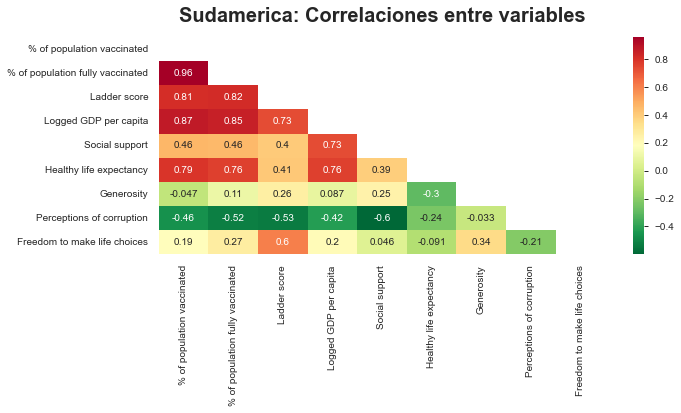

In [60]:
plt.figure(figsize=(10, 4))
sns.heatmap(sudf.corr(), annot = True, cmap='RdYlGn_r', mask=np.triu(np.ones_like(dfinal.corr())));
plt.title('Sudamerica: Correlaciones entre variables', fontsize=20, fontweight='bold', pad=15);

In [61]:
# En la sección 4.5 vimos que a nivel mundial la felicidad se correlacionaba con la vacunación en 0.72, pero había una mayor 
# correlación con el PBI (0.79), con las Expectativas de vida saludable (0.78) e incluso con el apoyo social (0.76), mientras 
# que la vacunación misma se correlacionaba más con el PBI (0.82) y las Expectativas de vida saludable (0.82).
# Sin embargo, en Sudamerica las cosas son un tanto diferentes. El índice de felicidad tiene una alta correlación con el % de
# población totalmente vacunada (0.82), seguido de lejos por el PBI percapita (0.73), más atrás vienen la LIbertad de elecciones
# de vida (0.6) y las percepciones de corrupción (-0.5). Por el lado de la vacunación, en Sudamerica, esta se correlaciona de 
# manera alta con el PBI (0.85), con la felicidad (0.82) y recién en tercer lugar con las expectativas de vida saludable (0.76).
# Consecuentemente podría decirse que en sudamerica la felicidad en la actualidad tiene que ver con la marcha de la economia pero 
# especialmente con la vacunación de su población.
# Un dato que llama la atención (o quizás no debería) es que a nivel mundial el apoyo social y la felicidad se correlacionan en 
# 0.76, y en sudamerica es solo 0.4. La solidaridad en nuestra región a pesar de tener promedios altos (mediana de 0.87) no está
# emparentada con la felicidad. Lo propio y en mayor grado se da con la generosidad,que solo correlaciona con la felicidad en
# 0.26, ser generosos no nos hace muy felices al parecer.

#### 4.6.3 Paises de más a menos felicidad 

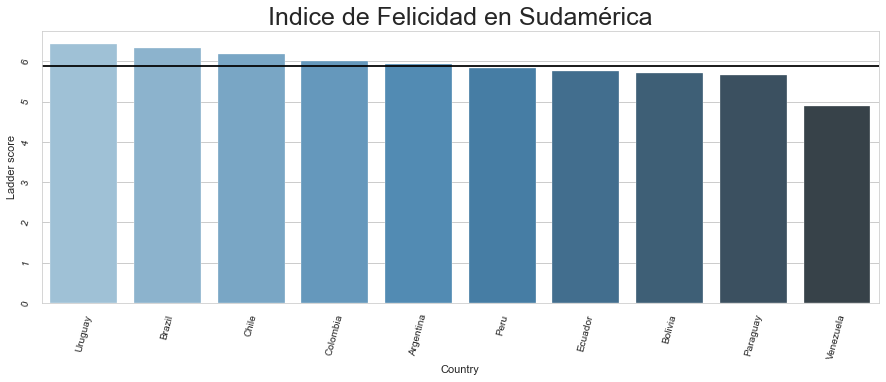

Country
Uruguay      6.431
Brazil       6.330
Chile        6.172
Colombia     6.012
Argentina    5.929
Peru         5.840
Ecuador      5.764
Bolivia      5.716
Paraguay     5.653
Venezuela    4.892
Name: Ladder score, dtype: float64


In [151]:
fig, ax = plt.subplots(figsize=(15,5))

order=list(sudf.groupby('Country')['Ladder score'].mean().sort_values(ascending=False).index)
sns.barplot(x='Country', y='Ladder score', order=order, data=sudf, palette="Blues_d")
plt.axhline(sudf["Ladder score"].mean(), c = "black") 
ax.tick_params(labelrotation=75)
plt.title('Indice de Felicidad en Sudamérica', fontsize=25)
plt.show()

print(sudf.groupby('Country')['Ladder score'].mean().sort_values(ascending=False))

In [64]:
# Uruguay (6.431) y Venezuela (4.892) son los casos extremos con respecto al Indice de Felicidad en sudamerica. Perú en sexto 
# lugar, ligeramente por debajo de la media regional (5.874).

#### 4.6.4 Paises de más a menos % de población completamente vacunados 

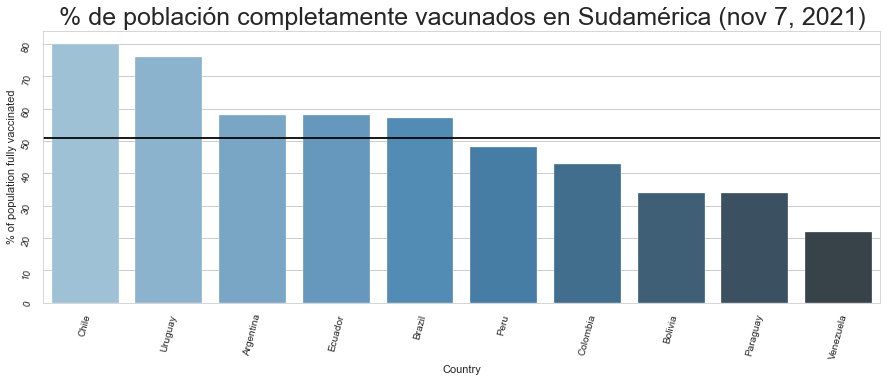

Country
Chile        80.0
Uruguay      76.0
Argentina    58.0
Ecuador      58.0
Brazil       57.0
Peru         48.0
Colombia     43.0
Bolivia      34.0
Paraguay     34.0
Venezuela    22.0
Name: % of population fully vaccinated, dtype: float64


In [65]:
fig, ax = plt.subplots(figsize=(15,5))

order=list(sudf.groupby('Country')['% of population fully vaccinated'].mean().sort_values(ascending=False).index)
sns.barplot(x='Country', y='% of population fully vaccinated', order=order, data=sudf, palette="Blues_d")
plt.axhline(sudf["% of population fully vaccinated"].mean(), c = "black")
plt.title('% de población completamente vacunados en Sudamérica (nov 7, 2021)', fontsize=25)
ax.tick_params(labelrotation=75)

plt.show()

print(sudf.groupby('Country')['% of population fully vaccinated'].mean().sort_values(ascending=False))

In [66]:
# Chile (80%) y Uruguay (76%) con niveles de vacunación europeos o asiáticos lideran la tabla en sudamerica. Perú con 48% está 
# sexto por debajo de la media en la región (51%). la disparidad entre los paises muestra hasta tres grupos, a la vez que una 
# posible falta de coordinación o apoyo mutuo y/o diferencias en los sistemas de salud, como se mencionó previamente.

### 4.6.5 Indice de Felicidad vs factores asociados - En la Región y por países

In [67]:
# Para finalizar vamos a mostrar los diagramas de dispersión entre el Indice de Felicidad con varios factores que podría explicar
# (junto a otros), porqué en sudamerica algunos paiuses son mas o menos felices que los demás. No se pretende decir que haya
# causalidad, pero sí buenas pistas a seguir para una explicación más sólida.

#### 4.6.5.1 Felicidad vs % de población completamente vacunada

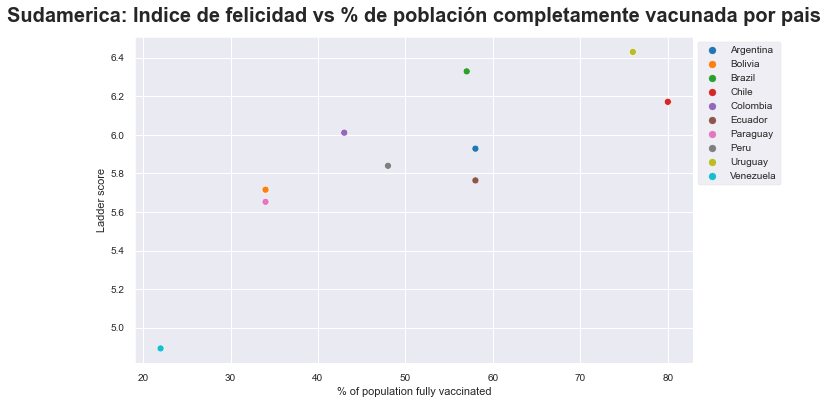

In [269]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.scatterplot(x="% of population fully vaccinated", y="Ladder score", hue="Country", data=sudf)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('Sudamerica: Indice de felicidad vs % de población completamente vacunada por pais', fontsize=20, fontweight='bold', pad=15);

plt.show();

In [69]:
# Con una correlación de 0.82, en el gráfico se observa una clara tendencia positiva entre el % de vacunación y el Indice de 
# felicidad. Venezuela a la zaga en vacunación y felicidad, mientras que Uruguay y Chile se despuntan en el otro extremo.
# Perú y Colombia disputándose el liderazgo de mitad de tabla hacia abajo, Perú algo mejor en vacunación y Colombia en felicidad.

#### 4.6.5.2 Felicidad vs PBI percapita

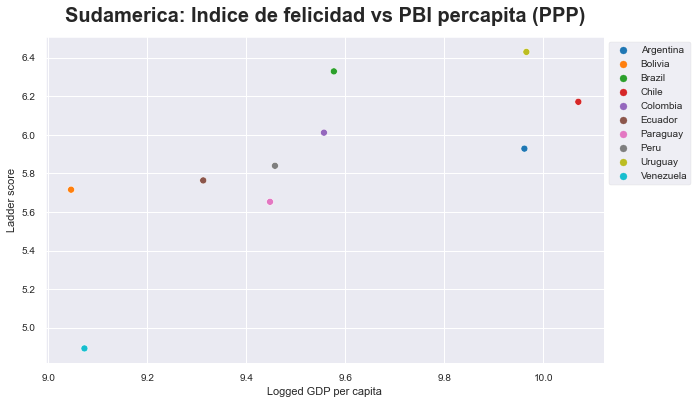

In [270]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Logged GDP per capita", y="Ladder score", hue="Country", data=sudf)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('Sudamerica: Indice de felicidad vs PBI percapita (PPP)', fontsize=20, fontweight='bold', pad=15);
plt.show();

In [71]:
# Existe también una tendencia positiva entre el PBI percapita y el Indice de felicidad (corr=0.73). Venezuela siempre abajo.
# Perú en el bloque del centro, Uruguay y Chile arriba.

#### 4.6.5.3 Felicidad vs Apoyo Social

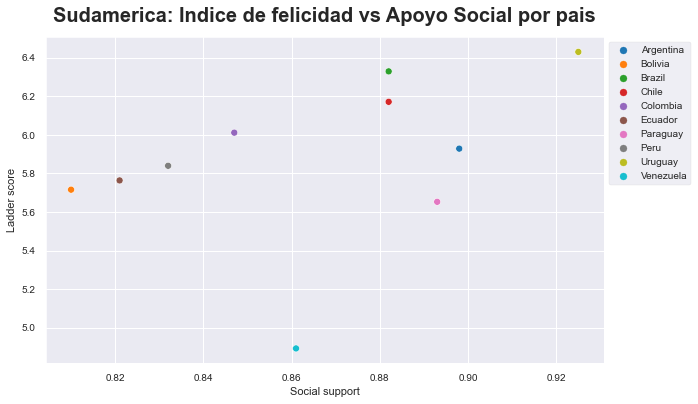

In [271]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Social support", y="Ladder score", hue="Country", data=sudf)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('Sudamerica: Indice de felicidad vs Apoyo Social por pais', fontsize=20, fontweight='bold', pad=15);
plt.show();

In [73]:
# Como ha sido mencionado anteriormente, contar con apoyo social en sudamerica tiene una mediana superior a 0.87, es decir casi
# 9 de cada 10 tiene alguien que lo pueda apoyar en caso de necesidad. Sin embargo, a pesar de ello a nivel de región la correlación
# entre apoyo social y felicidad es solo de 0.4. Podría en parte explicarse por la existencoia de tres bloques, el primero con
# una clara tendencia positiva, que son los paises con menores porcentajes de Apoyo social (Bolivia, Ecuador, Perú y Colombia).
# Un segundo grupo más disperso con respecto a la felicidad pero con porcentajes mayores de Apoyo social (Brasil, Chile, Argentina, 
# Paraguay y Uruguay), donde además Argentina y Paraguay rompen la tendencia. Y un tercer grupo que integra Venezuela (Apoyo 
# social medio y muy baja felicidad).
# En los países andinos (Bolivia, Ecuador, Perú y Colombia), La felicidad aumenta cuando crece la solidaridad, podría ser el 
# mensaje. 

#### 4.6.5.4 Felicidad vs Expectativa de vida saludable

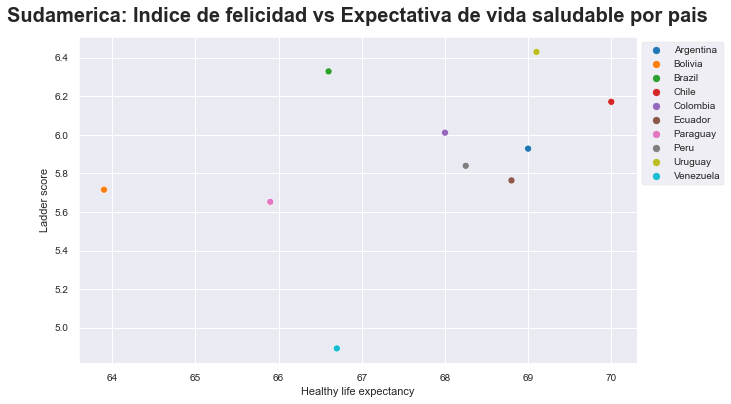

In [272]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Healthy life expectancy", y="Ladder score", hue="Country", data=sudf)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('Sudamerica: Indice de felicidad vs Expectativa de vida saludable por pais', fontsize=20, fontweight='bold', pad=15);
plt.show();

In [75]:
# En Sudamerica las expectativas de vida saludable no parecen ser un factor de felicidad, la correlación de ambas variables es 
# de solo 0.41, casi la mitad de lo que es a nivel mundial(0.78).Es probable que no seamos muy optimistas con el futuro o el
# futuro no es tan importante como el presente para los sudamericanos.

#### 4.6.5.5 Felicidad vs Generosidad

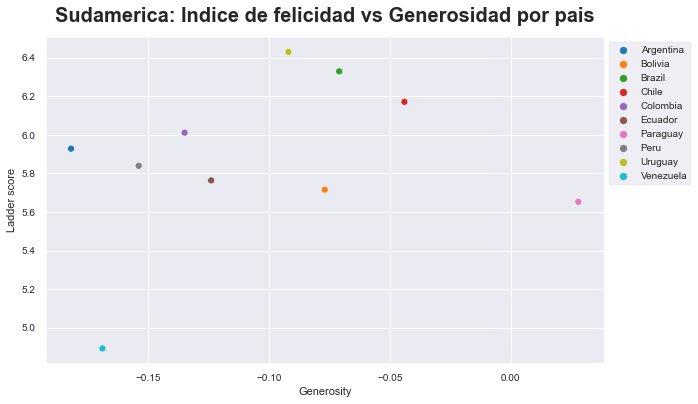

In [273]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Generosity", y="Ladder score", hue="Country", data=sudf)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('Sudamerica: Indice de felicidad vs Generosidad por pais', fontsize=20, fontweight='bold', pad=15);
plt.show();

In [77]:
# Al parecer La generosidad en Sudamérica no hace muy felices a su población, al menos eso da a entender el 0.26 de correlación
# entre ambas variables. A pesar de lo cual es alto si tomamos en cuenta que a nivel mundial la correlación es no solo mucho más
# baja sino negativa (-0.038). Si quitáramos a Colombia tendríamos incluso dos grupos con clara claramemnte negativa, los de 
# felcidad alta (mayor de 6)y los de felicidad media (entre 5.6 y 6). Venezuela aislado, bajo en todo.

#### 4.6.5.6 Felicidad vs Percepciones de corrupción

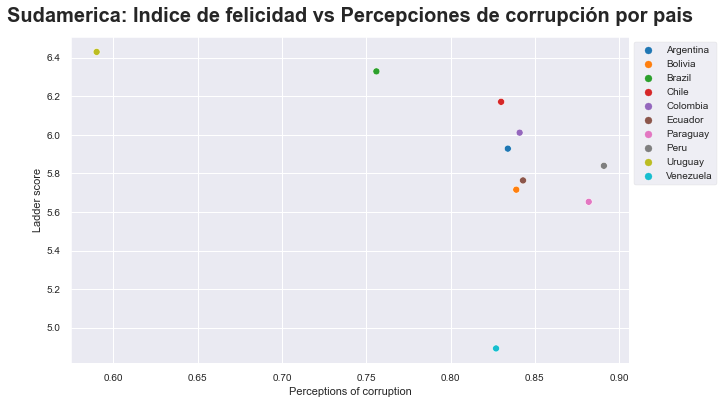

In [274]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Perceptions of corruption", y="Ladder score", hue="Country", data=sudf)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('Sudamerica: Indice de felicidad vs Percepciones de corrupción por pais', fontsize=20, fontweight='bold', pad=15);
plt.show();

In [79]:
# Uruguay es el país donde las percepciones de corrupción son las mas bajas y el Indice de felicidad el mas alto en Sudamérica. 
# La correlación negativa entre ambas variables se cumple en la región (-0.53) y puede observarse en el gráfico. Incluso supera
# al -0.44 en el mundo. 
# La correlación a nivel de región no es más alta debido a que el grupo de países con mayor percepción de corrupción (que lidera
# Perú), es más bien heterogeneo con respecto a sus Indices de felicidad. No obstante ello, la tendencia es negativa y trabajar
# en ese sentido es necesario, con las particularidades del caso.

#### 4.6.5.7 Felicidad vs Libertad para tomar decisiones

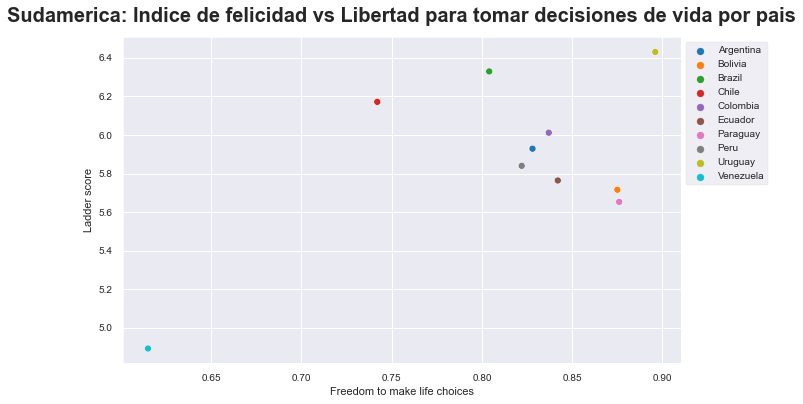

In [275]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Freedom to make life choices", y="Ladder score", hue="Country", data=sudf)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('Sudamerica: Indice de felicidad vs Libertad para tomar decisiones de vida por pais', fontsize=20, fontweight='bold', pad=15);
plt.show();

In [81]:
# La libertad para tomar decisiones de vida y el Indice de felicidad tienen una correlación de 0.6 en sudamérica al igual que
# en el mundo. Si una variable causara a la otra (que es algo que aquí no se está probando) se podría decir que la libertad tiene
# un efecto medio en la felicidad, no tiene la repercusión del PBI o la vacunación pero es la variable que le sigue y de ahí su
# importancia. La tendencia positiva es más clara en los países de mayor Indice de felicidad (Chile, Brsil y Uruguay). En el
# grupo de los paiuses de felicidad media, Perú está en un vértice de donde se desprende una tendencia positiva (con Argentina
# y Colombia) y otra negativa (con Ecuador, Bolivia y Paraguay). 

## 5. Hallazgos

In [82]:
# 1. El Índice de felicidad más alto en el mundo lo tiene Finlandia con 7.842, el más bajo es Afganistán con 2.523. Entre los 20
# países top el único país de Latinoamerica y el Caribe (LAC) es Costa Rica con 7.069. 

# 2. A nivel de regiones, Norteamérica-ANZ (EE.UU, Canada, New Zealand y Australia) lidera el Índice de felicidad con 7.128 y al
# final de la tabla está Asia del Sur con 4.44. LAC ocupa el cuarto lugar con 5.927.

# 3. Portugal es el país con mayor porcentaje de población totalmente vacunada en el mundo con 87%, Haití ocupa el último lugar 
# con 0.3%. Chile ocupa el 4to lugar con 80%, y junto con Uruguay (76%) son los únicos países de LAC dentro del top 20 mundial.

# 4. A nivel de regiones, Asia del Este ocupa el primer lugar con 71.2% de población completamente vacunada, Sub-Sahara África 
# el último con 8.13%. LAC ocupa el sexto lugar con 42.04 %, debajo de la media regional en el mundo de 43%.

# 5. A partir de la desviación estándar y distribución del % de vacunación en cada región (std), podemos constatar que en 
# Asia del Sur y del Sudeste, en el Medio Este y Norte de África y en LAC existen grandes diferencias en las cifras de 
# vacunación al interior de ellas. En el caso de LAC, ello podría deberse a que cada país actúa por su cuenta, sin concertar
# con sus vecinos, y por ello el que mejor gestión tenga para conseguir las vacunas y administrarlas a la población es quien
# estará en mejor situación.

# 6. A nivel mundial, el porcentajes de población completamente vacunada (2 dosis) y el Índice de felicidad tienen una correlación
# de 0.72, lo cual refleja una relación positiva entre ambas variables y que no es baja, por lo que no se puede dejar de tomarle
# la importancia del caso. Sin embargo, la vacunación tiene una correlación superior a 0.8 con el Producto Bruto Interno (PBI)
# percapita y con las expectativas de vida saludable. Y estas dos últimas (PBI y Expectativas de vida saludable) tienen entre 
# ellas una correlación de 0.87 lo que es bastante ilustrativo, interesante sería determinar el sentido de la causalidad. 
# Por su parte el Índice de felicidad (Ladder Score) tiene su correlación más alta con el PBI percapita (0.79), las Expectativas
# de vida saludable (0.78) y con el Apoyo social (0.76). No guarda relación con la generosidad (-0.038), y su relación con las 
# percepciones de corrupción y libertad de tomar decisiones de vida son bajas (-0.44 y 0.6 respectivamente).

# 7. Existe evidencia que apoya la existencia de una tendencia positiva entre un mayor porcentaje de población vacunada y un 
# mayor PBI con más altos índices de felicidad en el mundo. No se pretende decir aquí que a mayor población vacunada o mayor PBI
# percapita más feliz es su población o viceversa, pero la relación positiva se tiene. 

# 8. En cuanto a Sudamérica, a partir de las desviaciones estándar (std) observamos que las principales diferencias internas 
# están en las variables de porcentajes de vacunación, mientras que las menores están en las percepciones de corrupción y la 
# libertad de tomar decisones de vida, donde habría mayor homogeneidad.  Podría decirse entonces que nos diferencia la gestión 
# de la salud (o gestión institucional en general) y nos parecemos más en la corrupción.

# 9. En Sudamérica las cosas son un tanto diferentes al promedio mundial. El índice de felicidad tiene una alta correlación con 
# el % de población totalmente vacunada (0.82), seguido un poco lejos por el PBI percapita (0.73), más atrás vienen la Libertad 
# de tomar decisiones de vida (0.6) y las percepciones de corrupción (-0.5). 
# Por el lado de la vacunación, esta se correlaciona de manera alta con el PBI (0.85), con la felicidad (0.82) y recién en 
# tercer lugar con las expectativas de vida saludable (0.76). 
# Consecuentemente podría indicarse que en Sudamérica la felicidad, en la actualidad, tiene que ver con la marcha de la economía,
# pero especialmente con la vacunación de su población.

# 10.Un dato que llama la atención (o quizás no debería) es que a nivel mundial el apoyo social y la felicidad se correlacionan 
# en 0.76, y en Sudamérica es solo 0.4. La solidaridad en nuestra región a pesar de tener promedios altos (mediana de 0.87) no 
# está emparentada tanto con la felicidad. Lo propio y en mayor grado se da con la generosidad, que solo correlaciona con la 
# felicidad en 0.26, ser generosos no nos hace muy felices al parecer.

# 11.Uruguay (6.431) y Venezuela (4.892) son los casos extremos con respecto al Índice de Felicidad en Sudamérica. Perú en sexto
# lugar, ligeramente por debajo de la media regional (5.874).

# 12.Chile (80%) y Uruguay (76%) con niveles de vacunación europeos o asiáticos lideran la tabla en Sudamérica. Perú con 48% 
# está sexto por debajo de la media en la región (51%), aunque por encima del 37% de la media mundial por paises. la disparidad
# entre los países muestra hasta tres grupos (en cuanto a su distanciia a la media), lo que podría estar vinculado a la 
# heterogeneidad a nivel de regiones vistas anteriormente a través de las distribuciones. 

# 13.En Sudamérica existe una clara tendencia positiva entre el Índice de felicidad y el % de población completamente vacunados,
# y algo menor con el PBI percapita. Una tercera variable, pero de “efecto” medio es la Libertad para tomar decisiones de vida, 
# y más alejada pero todavía visible está la Percepción de corrupción. El Apoyo social y las expectativas de vida saludable no 
# serían variables que repercutan mucho en la felicidad, y mucho menos todavía la generosidad. La evidencia apunta a que, en la 
# etapa de pandemia que vivimos, la población es más feliz en la medida que haya mayor porcentaje de vacunados con dos dosis, 
# por encima incluso a tener mayores ingresos. Debe asimismo tenerse en cuenta que aplicar políticas generales y similares en la 
# región (por cuestiones políticas, ideológicas o la razón que sea) puede no tener los mismos resultados esperados en todos los 
# países.
# =============================================================================================================================